In [ ]:
#Random Forest trained with non-linear data, with data augmentation SAME for each label and using labels-v4
#Trained without time feature

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import os
import time

In [2]:
# nombre de instancia
# número restricciones
# número variables
# si es lineal o no (true / false)
# porcentaje de restricciones unarias, binarias, porcentaje de ternarias, porcentaje cuaternarias o más 
# porcentaje de terminos unarios, binarios, porcentaje de ternarios, porcentaje cuaternarios o más 
# porcentaje de terminos en la función obj
# porcentaje de terminos positivos/negativos en restricciones
# porcentaje de terminos positivos/negativos en funcion obj
# solver (label)

main_path="/global/scratch/users/cpezov/AAPBO/"
d_path=main_path+"datasets-v4/"
feat_path=d_path+"features/"

columns = ["# contraints","# variables","linearity","% 1 term constr","% 2 terms constr","% 3 terms constr","% 4+ terms constr","% degree 1 terms","% degree 2 terms","% degree 3 terms","% degree 4+ terms","% terms in obj func","% positive in constr","% positive in obj func","solver"]
names=[]
num_rest=[]
num_var=[]
linear=[]
r_unary=[]
r_binary=[]
r_ternary=[]
r_cuaternary=[]
t_unary=[]
t_binary=[]
t_ternary=[]
t_cuaternary=[]
t_fo=[]
t_pos_r=[]
t_pos_fo=[]
#timestep=[]
solvers=[]
solvers_anytime=[]

#Recolectar data de txt files
with open(d_path+"txt_files/data_ordered.txt") as f:
    lines = f.readlines()
    for l in lines:
        words=l.split()
        name=words[0][words[0].find("/")+1:]
        print(name)
        with open(feat_path+name) as feat_f:
            l=feat_f.readlines()
            w=l[0].split()
            # no timesteps
            #for n in range(500): #repetir 500 cada instancia, para que cuadre con los timesteps
            names.append(w[0])
            num_rest.append(int(w[1]))
            num_var.append(int(w[2]))
            linear.append(int(w[3]))
            r_unary.append(float(w[4]))
            r_binary.append(float(w[5]))
            r_ternary.append(float(w[6]))
            r_cuaternary.append(float(w[7]))
            t_unary.append(float(w[8]))
            t_binary.append(float(w[9]))
            t_ternary.append(float(w[10]))
            t_cuaternary.append(float(w[11]))
            t_fo.append(float(w[12]))
            t_pos_r.append(float(w[13]))
            t_pos_fo.append(float(w[14]))
            #timestep.append(n)
        
#las etiquetas corresponden solo a las del último timestep para cada instancia            
with open(main_path+"labels-v4.txt") as f:
    lines = f.readlines()
    for l in lines:
        words = l.split()
        solvers.append(int(words[-1]))
        for word in l.split():
            solvers_anytime.append(int(word))

Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-2-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-2-irEDCBA.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-1-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-1-irEDCBA.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-2-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-2-irEDCBA.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-1-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-1-irEDCBA.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-1-abcdeir.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-A-3-combined-EDCBAir.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-combined-irabcde.opb
Benchmark1/normalized-single-obj-f4-DataDisplay_2_order9.seq-B-3-combined-irEDCBA.opb
Benchmark1/normalized-single-ob

Benchmark15/normalized-single-obj-f56-FCS_FC1_order3_PB.seq-A-2-combined-EDCBAir.opb
Benchmark15/normalized-single-obj-f56-FCS_FC1_order3_PB.seq-A-2-combined-irEDCBA.opb
Benchmark16/normalized-single-obj-f58-fob_fxl_loss.seq-B-2-2-irabcde.opb
Benchmark16/normalized-single-obj-f58-fob_fxl_loss.seq-B-2-2-irEDCBA.opb
Benchmark16/normalized-single-obj-f58-fob_fxl_loss.seq-A-2-2-irabcde.opb
Benchmark16/normalized-single-obj-f58-fob_fxl_loss.seq-A-2-1-irEDCBA.opb
Benchmark16/normalized-single-obj-f58-fob_fxl_loss.seq-B-2-1-abcdeir.opb
Benchmark16/normalized-single-obj-f58-fob_fxl_loss.seq-B-2-1-irabcde.opb
Benchmark16/normalized-single-obj-f58-fob_fxl_loss.seq-A-2-1-irabcde.opb
Benchmark16/normalized-single-obj-f58-fob_fxl_loss.seq-B-2-1-irEDCBA.opb
Benchmark16/normalized-single-obj-f58-fob_fxl_loss.seq-A-2-combined-irabcde.opb
Benchmark16/normalized-single-obj-f58-fob_fxl_loss.seq-B-2-combined-irabcde.opb
Benchmark16/normalized-single-obj-f58-fob_fxl_loss.seq-B-3-2-irabcde.opb
Benchmark16/n

Benchmark41/normalized-autocorr_bern20-03.lin.opb
Benchmark41/normalized-autocorr_bern25-03.lin.opb
Benchmark41/normalized-autocorr_bern20-05.lin.opb
Benchmark41/normalized-autocorr_bern30-04.lin.opb
Benchmark41/normalized-autocorr_bern35-04.lin.opb
Benchmark41/normalized-autocorr_bern25-06.lin.opb
Benchmark41/normalized-autocorr_bern40-05.lin.opb
Benchmark41/normalized-autocorr_bern45-05.lin.opb
Benchmark41/normalized-autocorr_bern20-10.lin.opb
Benchmark41/normalized-autocorr_bern50-06.lin.opb
Benchmark41/normalized-autocorr_bern30-08.lin.opb
Benchmark41/normalized-autocorr_bern55-06.lin.opb
Benchmark41/normalized-autocorr_bern35-09.lin.opb
Benchmark41/normalized-autocorr_bern20-15.lin.opb
Benchmark41/normalized-autocorr_bern25-13.lin.opb
Benchmark41/normalized-autocorr_bern60-08.lin.opb
Benchmark41/normalized-autocorr_bern40-10.lin.opb
Benchmark41/normalized-autocorr_bern45-11.lin.opb
Benchmark41/normalized-autocorr_bern30-15.lin.opb
Benchmark41/normalized-autocorr_bern25-19.lin.opb


Benchmark59/normalized-graphpart_clique-50.opb
Benchmark59/normalized-graphpart_clique-60.opb
Benchmark59/normalized-graphpart_clique-70.opb
Benchmark60/normalized-hmittelman.opb
Benchmark61/normalized-sporttournament06.opb
Benchmark61/normalized-sporttournament08.opb
Benchmark61/normalized-sporttournament10.opb
Benchmark61/normalized-sporttournament12.opb
Benchmark61/normalized-sporttournament16.opb
Benchmark61/normalized-sporttournament18.opb
Benchmark61/normalized-sporttournament20.opb
Benchmark61/normalized-sporttournament22.opb
Benchmark61/normalized-sporttournament24.opb
Benchmark61/normalized-sporttournament26.opb
Benchmark61/normalized-sporttournament28.opb
Benchmark61/normalized-sporttournament30.opb
Benchmark61/normalized-sporttournament32.opb
Benchmark61/normalized-sporttournament34.opb
Benchmark61/normalized-sporttournament36.opb
Benchmark61/normalized-sporttournament38.opb
Benchmark61/normalized-sporttournament40.opb
Benchmark61/normalized-sporttournament42.opb
Benchmark61

Benchmark97/normalized-minisat100_16_6_1_ic.opb
Benchmark97/normalized-minisat100_16_6_0_ic.opb
Benchmark97/normalized-minisat100_16_6_6_mh.opb
Benchmark97/normalized-minisat100_16_6_0_mh.opb
Benchmark97/normalized-minisat100_16_6_1_mh.opb
Benchmark97/normalized-minisat100_16_6_3_mh.opb
Benchmark97/normalized-minisat100_16_6_7_mh.opb
Benchmark97/normalized-minisat100_16_6_8_mh.opb
Benchmark97/normalized-minisat100_16_6_4_mh.opb
Benchmark97/normalized-minisat100_16_6_9_mh.opb
Benchmark97/normalized-minisat100_16_6_2_mh.opb
Benchmark97/normalized-minisat100_16_6_5_mh.opb
Benchmark98/normalized-minisat15_4_4_9_mh_ic.opb
Benchmark98/normalized-minisat15_4_4_8_mh_ic.opb
Benchmark98/normalized-minisat15_4_4_6_mh_ic.opb
Benchmark98/normalized-minisat15_4_4_5_mh_ic.opb
Benchmark98/normalized-minisat15_4_4_3_mh_ic.opb
Benchmark98/normalized-minisat15_4_4_1_mh_ic.opb
Benchmark98/normalized-minisat15_4_4_0_mh_ic.opb
Benchmark99/normalized-minisat25_4_7_8_mh_ic.opb
Benchmark99/normalized-minisat25

Benchmark157/normalized-neos-859770.opb
Benchmark157/normalized-neos-777800.opb
Benchmark157/normalized-neos-544324.opb
Benchmark157/normalized-neos18.opb
Benchmark157/normalized-neos-1109824.opb
Benchmark157/normalized-neos-506428.opb
Benchmark157/normalized-neos-631710.opb
Benchmark158/normalized-ns894788.opb
Benchmark158/normalized-ns1745726.opb
Benchmark158/normalized-ns1696083.opb
Benchmark158/normalized-ns894244.opb
Benchmark158/normalized-ns1853823.opb
Benchmark159/normalized-p6b.opb
Benchmark160/normalized-pb-simp-nonunif.opb
Benchmark161/normalized-protfold.opb
Benchmark162/normalized-queens-30.opb
Benchmark163/normalized-seymour.opb
Benchmark164/normalized-tanglegram1.opb
Benchmark164/normalized-tanglegram3.opb
Benchmark165/normalized-toll-like.opb
Benchmark166/normalized-wnq-n100-mw99-14.opb
Benchmark167/normalized-mul_8_3_shg.opb
Benchmark167/normalized-mul_8_9_shg.opb
Benchmark167/normalized-mul_8_14_shg.opb
Benchmark167/normalized-mul_8_11_shg.opb
Benchmark167/normalized-

Benchmark182/normalized-randcebca4.cudf.paranoid.opb
Benchmark182/normalized-rand27da90.cudf.paranoid.opb
Benchmark182/normalized-rand3c03fd.cudf.paranoid.opb
Benchmark182/normalized-randf794d2.cudf.paranoid.opb
Benchmark182/normalized-randc5fe62.cudf.paranoid.opb
Benchmark182/normalized-rand18b530.cudf.paranoid.opb
Benchmark182/normalized-randa2004a.cudf.paranoid.opb
Benchmark182/normalized-randfd04d4.cudf.paranoid.opb
Benchmark182/normalized-rand5d20db.cudf.paranoid.opb
Benchmark182/normalized-rand4b919e.cudf.paranoid.opb
Benchmark182/normalized-rand362510.cudf.paranoid.opb
Benchmark182/normalized-rand0a62b6.cudf.paranoid.opb
Benchmark182/normalized-randc18b26.cudf.paranoid.opb
Benchmark182/normalized-rand71b131.cudf.paranoid.opb
Benchmark183/normalized-1078.cudf.trendy.opb
Benchmark183/normalized-787.cudf.trendy.opb
Benchmark183/normalized-1021.cudf.trendy.opb
Benchmark183/normalized-995.cudf.trendy.opb
Benchmark184/normalized-j3010_4.std.opb
Benchmark184/normalized-j3010_3.std.opb


Benchmark193/normalized-aries-da_network_1000_5__369_766__512.opb
Benchmark193/normalized-aries-da_network_1000_5__369_766__1024.opb
Benchmark193/normalized-aries-da_network_1000_5__369_766__2048.opb
Benchmark194/normalized-aries-da_network_2000_5__647_1792.opb
Benchmark194/normalized-aries-da_network_2000_5__647_1792__8.opb
Benchmark194/normalized-aries-da_network_2000_5__647_1792__16.opb
Benchmark194/normalized-aries-da_network_2000_5__647_1792__32.opb
Benchmark194/normalized-aries-da_network_2000_5__647_1792__64.opb
Benchmark194/normalized-aries-da_network_2000_5__647_1792__128.opb
Benchmark194/normalized-aries-da_network_2000_5__647_1792__256.opb
Benchmark194/normalized-aries-da_network_2000_5__647_1792__512.opb
Benchmark194/normalized-aries-da_network_2000_5__647_1792__1024.opb
Benchmark195/normalized-aries-da_network_3000_5__126_2812.opb
Benchmark195/normalized-aries-da_network_3000_5__126_2812__8.opb
Benchmark195/normalized-aries-da_network_3000_5__126_2812__16.opb
Benchmark195/

Benchmark212/normalized-bsg_500_10_5.opb
Benchmark212/normalized-bsg_500_10_4.opb
Benchmark212/normalized-bsg_500_10_3.opb
Benchmark212/normalized-bsg_500_10_2.opb
Benchmark212/normalized-bsg_500_10_1.opb
Benchmark213/normalized-bsg_1000_60_5.opb
Benchmark213/normalized-bsg_1000_60_4.opb
Benchmark213/normalized-bsg_1000_60_3.opb
Benchmark213/normalized-bsg_1000_60_2.opb
Benchmark213/normalized-bsg_1000_60_1.opb
Benchmark213/normalized-bsg_1000_25_5.opb
Benchmark213/normalized-bsg_1000_25_4.opb
Benchmark213/normalized-bsg_1000_25_3.opb
Benchmark213/normalized-bsg_1000_25_2.opb
Benchmark213/normalized-bsg_1000_25_1.opb
Benchmark214/normalized-mds_10_4_1.opb
Benchmark214/normalized-mds_10_4_5.opb
Benchmark214/normalized-mds_10_4_4.opb
Benchmark214/normalized-mds_10_4_3.opb
Benchmark214/normalized-mds_10_4_2.opb
Benchmark215/normalized-mds_50_25_5.opb
Benchmark215/normalized-mds_50_25_4.opb
Benchmark215/normalized-mds_50_25_2.opb
Benchmark215/normalized-mds_50_25_1.opb
Benchmark215/normali

Benchmark227/factor-mod-size=6-P0=17-P1=11-P2=61-P3=5-P4=53-P5=7-P6=37-P7=7-B.opb
Benchmark227/factor-mod-size=6-P0=29-P1=59-P2=11-P3=29-P4=29-P5=11-P6=41-P7=53-B.opb
Benchmark227/factor-mod-size=6-P0=5-P1=59-P2=47-P3=43-P4=7-P5=19-P6=67-P7=41-B.opb
Benchmark227/factor-mod-size=6-P0=67-P1=47-P2=2-P3=53-P4=23-P5=7-P6=41-P7=31-B.opb
Benchmark227/factor-mod-size=6-P0=47-P1=23-P2=47-P3=53-P4=59-P5=23-P6=37-P7=61-B.opb
Benchmark227/factor-mod-size=6-P0=11-P1=2-P2=41-P3=47-P4=37-P5=17-P6=41-P7=43-P8=59-B.opb
Benchmark227/factor-mod-size=6-P0=41-P1=53-P2=67-P3=59-P4=53-P5=61-P6=29-P7=29-P8=17-B.opb
Benchmark227/factor-mod-size=6-P0=29-P1=2-P2=59-P3=2-P4=47-P5=53-P6=37-P7=53-P8=53-B.opb
Benchmark227/factor-mod-size=6-P0=53-P1=53-P2=41-P3=41-P4=41-P5=53-P6=41-P7=47-P8=17-B.opb
Benchmark227/factor-mod-size=6-P0=23-P1=11-P2=13-P3=17-P4=19-P5=53-P6=67-P7=29-P8=7-B.opb
Benchmark227/factor-mod-size=6-P0=5-P1=53-P2=23-P3=7-P4=31-P5=59-P6=59-P7=37-P8=41-P9=67-B.opb
Benchmark227/factor-mod-size=6-P0=11

Benchmark230/factor-mod-size=9-P0=71-P1=439-B.opb
Benchmark230/factor-mod-size=9-P0=97-P1=127-B.opb
Benchmark230/factor-mod-size=9-P0=271-P1=293-B.opb
Benchmark230/factor-mod-size=9-P0=41-P1=331-P2=37-B.opb
Benchmark230/factor-mod-size=9-P0=419-P1=479-P2=367-B.opb
Benchmark230/factor-mod-size=9-P0=149-P1=191-P2=199-B.opb
Benchmark230/factor-mod-size=9-P0=137-P1=127-P2=347-B.opb
Benchmark230/factor-mod-size=9-P0=457-P1=137-P2=191-B.opb
Benchmark230/factor-mod-size=9-P0=263-P1=409-P2=29-P3=379-B.opb
Benchmark230/factor-mod-size=9-P0=499-P1=293-P2=223-P3=277-B.opb
Benchmark230/factor-mod-size=9-P0=19-P1=337-P2=467-P3=53-B.opb
Benchmark230/factor-mod-size=9-P0=149-P1=419-P2=307-P3=223-B.opb
Benchmark230/factor-mod-size=9-P0=487-P1=163-P2=173-P3=211-B.opb
Benchmark230/factor-mod-size=9-P0=347-P1=137-P2=419-P3=449-P4=47-B.opb
Benchmark230/factor-mod-size=9-P0=251-P1=139-P2=89-P3=173-P4=107-B.opb
Benchmark230/factor-mod-size=9-P0=449-P1=149-P2=137-P3=137-P4=83-B.opb
Benchmark230/factor-mod-si

Benchmark242/normalized-mps-v2-20-10-bienst2.opb
Benchmark242/normalized-mps-v2-20-10-bienst1.opb
Benchmark243/normalized-mps-v2-20-10-dano3_5.opb
Benchmark243/normalized-mps-v2-20-10-dano3_4.opb
Benchmark243/normalized-mps-v2-20-10-dano3_3.opb
Benchmark244/normalized-mps-v2-20-10-markshare1_1.opb
Benchmark244/normalized-mps-v2-20-10-markshare2_1.opb
Benchmark245/normalized-mps-v2-20-10-mkc1.opb
Benchmark246/normalized-mps-v2-20-10-neos17.opb
Benchmark246/normalized-mps-v2-20-10-neos20.opb
Benchmark246/normalized-mps-v2-20-10-neos11.opb
Benchmark246/normalized-mps-v2-20-10-neos15.opb
Benchmark246/normalized-mps-v2-20-10-neos14.opb
Benchmark246/normalized-mps-v2-20-10-neos13.opb
Benchmark246/normalized-mps-v2-20-10-neos6.opb
Benchmark246/normalized-mps-v2-20-10-neos12.opb
Benchmark246/normalized-mps-v2-20-10-neos2.opb
Benchmark246/normalized-mps-v2-20-10-neos7.opb
Benchmark246/normalized-mps-v2-20-10-neos3.opb
Benchmark247/normalized-mps-v2-20-10-nug08.opb
Benchmark248/normalized-mps-v2

Benchmark311/normalized-mps-v2-20-10-neos9.opb
Benchmark312/normalized-reduced-mps-v2-20-10-ds.opb
Benchmark313/normalized-reduced-mps-v2-20-10-fome12.opb
Benchmark313/normalized-reduced-mps-v2-20-10-fome13.opb
Benchmark314/normalized-ws97-3.opb
Benchmark315/normalized-mps-v2-20-10-bm23.opb
Benchmark316/normalized-mps-v2-20-10-cracpb1.opb
Benchmark318/normalized-mps-v2-20-10-lseu.opb
Benchmark318/normalized-mps-v2-20-10-lp4l.opb
Benchmark318/normalized-mps-v2-20-10-l152lav.opb
Benchmark319/normalized-mps-v2-20-10-mod008.opb
Benchmark319/normalized-mps-v2-20-10-mod010.opb
Benchmark320/normalized-mps-v2-20-10-p0033.opb
Benchmark320/normalized-mps-v2-20-10-p0040.opb
Benchmark320/normalized-mps-v2-20-10-p0201.opb
Benchmark320/normalized-mps-v2-20-10-p0548.opb
Benchmark321/normalized-mps-v2-20-10-sentoy.opb
Benchmark322/normalized-mps-v2-20-10-stein9.opb
Benchmark322/normalized-mps-v2-20-10-stein15.opb
Benchmark322/normalized-mps-v2-20-10-stein27.opb
Benchmark322/normalized-mps-v2-20-10-ste

Benchmark334/normalized-reduced-mps-v2-20-10-ran17x17.opb
Benchmark335/normalized-reduced-mps-v2-20-10-fome11.opb
Benchmark336/normalized-reduced-mps-v2-20-10-markshare1_1.opb
Benchmark336/normalized-reduced-mps-v2-20-10-markshare2_1.opb
Benchmark336/normalized-reduced-mps-v2-20-10-neos20.opb
Benchmark336/normalized-reduced-mps-v2-20-10-bienst2.opb
Benchmark336/normalized-reduced-mps-v2-20-10-bienst1.opb
Benchmark336/normalized-reduced-mps-v2-20-10-seymour1.opb
Benchmark336/normalized-reduced-mps-v2-20-10-neos15.opb
Benchmark336/normalized-reduced-mps-v2-20-10-neos14.opb
Benchmark336/normalized-reduced-mps-v2-20-10-neos13.opb
Benchmark336/normalized-reduced-mps-v2-20-10-neos6.opb
Benchmark336/normalized-reduced-mps-v2-20-10-mkc1.opb
Benchmark336/normalized-reduced-mps-v2-20-10-neos2.opb
Benchmark336/normalized-reduced-mps-v2-20-10-nug08.opb
Benchmark336/normalized-reduced-mps-v2-20-10-neos7.opb
Benchmark336/normalized-reduced-mps-v2-20-10-neos3.opb
Benchmark336/normalized-reduced-mps-v

Benchmark355/normalized-g15x15.opb
Benchmark355/normalized-g100x100.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_12.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_19.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_14.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_18.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_22.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_10.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_20.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_11.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_15.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_24.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_13.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_16.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_21.opb.PB06.opb
Benchmark356/normalized-domset_v500_e2000_w30_mw19_23.opb

Benchmark374/normalized-factor-size=9-P=97-Q=479.opb
Benchmark374/normalized-factor-size=9-P=97-Q=457.opb
Benchmark374/normalized-factor-size=9-P=97-Q=331.opb
Benchmark374/normalized-factor-size=9-P=307-Q=331.opb
Benchmark374/normalized-factor-size=9-P=89-Q=431.opb
Benchmark374/normalized-factor-size=9-P=89-Q=347.opb
Benchmark374/normalized-factor-size=9-P=307-Q=347.opb
Benchmark374/normalized-factor-size=9-P=307-Q=367.opb
Benchmark374/normalized-factor-size=9-P=89-Q=263.opb
Benchmark374/normalized-factor-size=9-P=89-Q=211.opb
Benchmark374/normalized-factor-size=9-P=83-Q=89.opb
Benchmark374/normalized-factor-size=9-P=307-Q=431.opb
Benchmark374/normalized-factor-size=9-P=83-Q=367.opb
Benchmark374/normalized-factor-size=9-P=83-Q=271.opb
Benchmark374/normalized-factor-size=9-P=307-Q=449.opb
Benchmark374/normalized-factor-size=9-P=31-Q=439.opb
Benchmark374/normalized-factor-size=9-P=79-Q=257.opb
Benchmark374/normalized-factor-size=9-P=79-Q=173.opb
Benchmark374/normalized-factor-size=9-P=79

Benchmark374/normalized-factor-size=9-P=281-Q=331.opb
Benchmark374/normalized-factor-size=9-P=281-Q=499.opb
Benchmark374/normalized-factor-size=9-P=29-Q=163.opb
Benchmark374/normalized-factor-size=9-P=29-Q=277.opb
Benchmark374/normalized-factor-size=9-P=29-Q=331.opb
Benchmark374/normalized-factor-size=9-P=29-Q=479.opb
Benchmark374/normalized-factor-size=9-P=29-Q=71.opb
Benchmark374/normalized-factor-size=9-P=293-Q=307.opb
Benchmark375/normalized-frb30-15-5.opb
Benchmark375/normalized-frb30-15-3.opb
Benchmark375/normalized-frb30-15-1.opb
Benchmark375/normalized-frb30-15-4.opb
Benchmark375/normalized-frb30-15-2.opb
Benchmark376/normalized-frb35-17-4.opb
Benchmark376/normalized-frb35-17-2.opb
Benchmark376/normalized-frb35-17-1.opb
Benchmark376/normalized-frb35-17-3.opb
Benchmark376/normalized-frb35-17-5.opb
Benchmark377/normalized-frb40-19-3.opb
Benchmark377/normalized-frb40-19-2.opb
Benchmark377/normalized-frb40-19-1.opb
Benchmark377/normalized-frb40-19-4.opb
Benchmark377/normalized-frb4

In [3]:
#Crear dataframe
# dataframe with no names, so that it doesn't convert everything to str 
data=np.array([num_rest,num_var,linear,r_unary,r_binary,r_ternary,r_cuaternary,t_unary,t_binary,t_ternary,t_cuaternary,t_fo,t_pos_r,t_pos_fo,solvers])
df = pd.DataFrame(data.T, columns=columns)

#print(df.head())

In [4]:
x=df[["# contraints","# variables","linearity","% 1 term constr","% 2 terms constr","% 3 terms constr","% 4+ terms constr","% degree 1 terms","% degree 2 terms","% degree 3 terms","% degree 4+ terms","% terms in obj func","% positive in constr","% positive in obj func"]]
y=df[['solver']]
y_anytime=pd.DataFrame(solvers_anytime, columns=["solver"])

#agrupar diferentes timestpes de cada instancia en un mismo set
random.seed(9) #same seed to generate same random numbers as other models
train_indx=[]
test_indx=[]
test_indx_anytime=[]
for i in range(0,3128): # v4
    r = random.randint(0,2)
    if(r==2):
        test_indx.append(i)
        for j in range(0,500):
            test_indx_anytime.append(500*i+j)
    else:
        train_indx.append(i)

x_train=x.iloc[train_indx]
x_test=x.iloc[test_indx]
y_train=y.iloc[train_indx]
y_test=y.iloc[test_indx]
y_train_og=y.iloc[train_indx]

y_test_anytime=y_anytime.iloc[test_indx_anytime]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2054, 14)
(1074, 14)
(2054, 1)
(1074, 1)


In [5]:
print("solver / #instances")
for i in range(8):
    print(str(i)+": "+str(len(y.loc[y['solver'] == i])))

solver / #instances
0: 169
1: 37
2: 103
3: 119
4: 451
5: 1633
6: 235
7: 381


In [6]:
#Data augmentation para training set de instancias con clases distintas a gurobi (5)

indx_dis=[] #indexes of instances with disadvantaged labels 

#identificar instancias que tengan clase distinta a gurobi
for i in train_indx:
    if(solvers[i]!=5):
        indx_dis.append(i)

print(len(indx_dis))
print(len(train_indx), end="\n\n")            

#agregar las instancias al final de x_train e y_train
x_train_dis=x.iloc[indx_dis]
y_train_dis=y.iloc[indx_dis]

x_train=x_train.append(x_train_dis)
y_train=y_train.append(y_train_dis)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

984
2054

(3038, 14)
(1074, 14)
(3038, 1)
(1074, 1)


In [7]:
rf_model = RandomForestClassifier(n_estimators=100, max_features="sqrt", criterion="gini",random_state=3)
rf_model.fit(np.nan_to_num(x_train.astype(np.float32)), y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [8]:
y_pred = rf_model.predict(np.nan_to_num(x_test.astype(np.float32)))

In [9]:
print("Accuracy sin anytime",metrics.accuracy_score(y_test.values.ravel(), y_pred))
pred = rf_model.predict_proba(np.nan_to_num(x_test.astype(np.float32)))
print("Loss",metrics.log_loss(y_test.values.ravel(), pred))

Accuracy sin anytime 0.7318435754189944
Loss 1.6408487151122562


#Load y_pred-no_time

y_pred = np.loadtxt(main_path+"models/v4/randomForest_nonlinear-v4-no_time/results/y_preds-no_time.txt")
y_pred

In [10]:
y_pred_anytime = []

for pred in y_pred:
    for i in range(500):
        y_pred_anytime.append(pred)
        
y_pred_anytime = np.array(y_pred_anytime)

In [11]:
print("Accuracy Anytime",metrics.accuracy_score(y_test_anytime.values.ravel(), y_pred_anytime))

Accuracy Anytime 0.6649702048417132


In [12]:
#Save
y_test_np=y_test.to_numpy()
f = open(main_path+"models/v4/randomForest_nonlinear-v4-no_time/results/y_test.txt", "w")
np.savetxt(f,y_test_np.reshape(y_test_np.shape[0], -1),fmt="%s")
f.close()

l=int(len(y_pred_anytime)/500)
y_pred_time_np=y_pred_anytime.reshape(l,500)
f = open(main_path+"models/v4/randomForest_nonlinear-v4-no_time/results/y_preds.txt", "w")
np.savetxt(f,y_pred_time_np.reshape(y_pred_time_np.shape[0],-1),fmt='%s')
f.close()

y_pred_np=y_pred
f = open(main_path+"models/v4/randomForest_nonlinear-v4-no_time/results/y_preds-no_time.txt", "w")
np.savetxt(f,y_pred_np.reshape(y_pred_np.shape[0],-1),fmt='%s')
f.close()

#print(y_train_np.shape)
#print(y_pred_np)

In [13]:
y_train_np=y_train.to_numpy()
f = open(main_path+"models/v4/randomForest_nonlinear-v4-no_time/results/y_train.txt", "w")
np.savetxt(f,y_train_np.reshape(y_train_np.shape[0], -1),fmt="%s")
f.close()

y_train_og_np=y_train_og.to_numpy()
f = open(main_path+"models/v4/randomForest_nonlinear-v4-no_time/results/y_train_og.txt", "w")
np.savetxt(f,y_train_og_np.reshape(y_train_og_np.shape[0], -1),fmt="%s")
f.close()

In [14]:
#Feature importances
importances = rf_model.feature_importances_
feats = x.columns

f=open(main_path+"models/v4/randomForest_nonlinear-v4-no_time/results/features_and_acc.txt", "w")

i=0
while i < len(feats):
    print("Importance of feature "+feats[i]+" is "+str(importances[i]))
    f.write("Importance of feature "+feats[i]+" is "+str(importances[i]))
    i = i+1

print(metrics.accuracy_score(y_test.values.ravel(), y_pred))
f.write("Testing accuracy: "+str(metrics.accuracy_score(y_test.values.ravel(), y_pred)))

f.close()

Importance of feature # contraints is 0.11985395152459744
Importance of feature # variables is 0.09889241437236175
Importance of feature linearity is 0.012942118227530686
Importance of feature % 1 term constr is 0.05389231152486331
Importance of feature % 2 terms constr is 0.06867311235184789
Importance of feature % 3 terms constr is 0.06774927769188721
Importance of feature % 4+ terms constr is 0.09452105892809622
Importance of feature % degree 1 terms is 0.1263782590600271
Importance of feature % degree 2 terms is 0.03695908081556475
Importance of feature % degree 3 terms is 0.0017476353836268505
Importance of feature % degree 4+ terms is 0.002578393110063448
Importance of feature % terms in obj func is 0.1483392844730636
Importance of feature % positive in constr is 0.111012456323607
Importance of feature % positive in obj func is 0.0564606462128627
0.7318435754189944


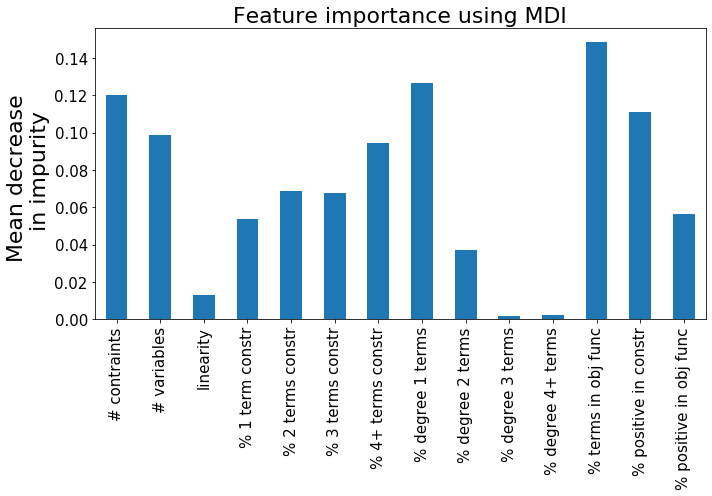

In [16]:
#Grafico feature importances
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feats)

fsize = 22

fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax, figsize = (10,7), fontsize=fsize-7)
forest_importances.plot.bar(ax=ax, figsize = (10,7), fontsize=fsize-7)
plt.xticks(rotation=90, fontsize=fsize-7)
ax.set_title("Feature importance using MDI", fontsize=fsize)
ax.set_ylabel("Mean decrease \n in impurity", fontsize=fsize)
fig.tight_layout()

#print(importances)

https://data36.com/random-forest-in-python/


# Prediction Time

In [14]:
#Calcular tiempos de predicción por cada par instancia-tiempo de test
#(Correr esto se demora 1 hora aprox)

t_preds=np.empty(len(y_pred))
i=0

#prediccion
for idx in test_indx:
    #crear dataframe de solo esa instancia
    x_i = x.iloc[[idx]]
    
    #hacer predicción y medir tiempo
    start=time.time()
    y_i = rf_model.predict(np.nan_to_num(x_i.astype(np.float32)))
    tiempo=time.time()-start
    t_preds[i]=tiempo
    
    i=i+1

In [15]:
#Guardar tiempos de prediccion

print(t_preds)
f = open(main_path+"models/results-v4/pred_times/t_pred_randomForest_nonlinear-v4-no_time.txt", "w")
np.savetxt(f, t_preds, delimiter=" ", fmt="%s")
f.close()

[0.02369356 0.0182972  0.01643324 ... 0.00870848 0.0086267  0.00857043]
